16/16 [==============================] - 32s 2s/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.97       102

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

Validation Accuracy (SVM): 96.50%


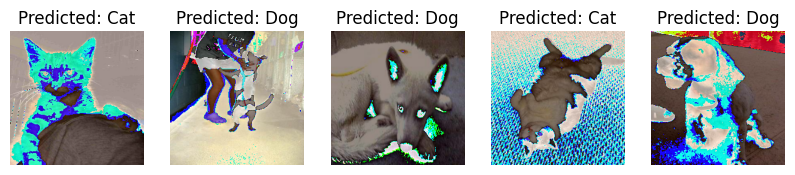

In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Function to load images and preprocess them for VGG16
def load_and_preprocess_images(dataset_path, max_images_per_class=None, infer_labels=True):
    images = []
    labels = []
    image_files = [os.path.join(root, file) 
                   for root, _, files in os.walk(dataset_path) 
                   for file in files if file.endswith(('jpg', 'jpeg', 'png'))]

    if max_images_per_class:
        image_files = shuffle(image_files, random_state=42)[:max_images_per_class]

    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is not None and img.size != 0:
            img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
            img = img_to_array(img)
            img = preprocess_input(img)
            images.append(img)
            
            if infer_labels:
                if 'cat' in img_path.lower():
                    labels.append(0)
                elif 'dog' in img_path.lower():
                    labels.append(1)
        else:
            print(f"Failed to load image: {img_path}")

    if infer_labels:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

train_dataset_path = r'E:\PRODIGY INTERNSHIP\TASK 3\train\train'
test_dataset_path = r'E:\PRODIGY INTERNSHIP\TASK 3\test\test'

max_images_per_class_train = 1000
max_images_test = 500

X_train, y_train = load_and_preprocess_images(train_dataset_path, max_images_per_class_train)

X_test = load_and_preprocess_images(test_dataset_path, max_images_test, infer_labels=False)

if len(X_train) == 0:
    print("No training images found.")
elif len(X_test) == 0:
    print("No test images found.")
else:
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

    X_train_features = model.predict(X_train)
    X_train_features = X_train_features.reshape((X_train_features.shape[0], -1))

    X_test_features = model.predict(X_test)
    X_test_features = X_test_features.reshape((X_test_features.shape[0], -1))

    X_train_f, X_val_f, y_train, y_val = train_test_split(X_train_features, y_train, test_size=0.2, random_state=42)

    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_train_f, y_train)

    y_val_pred = svm_clf.predict(X_val_f)

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy (SVM): {val_accuracy * 100:.2f}%')

    y_test_pred = svm_clf.predict(X_test_features)

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[i].astype(np.uint8))  # Convert from float to uint8
        plt.title("Predicted: " + ("Cat" if y_test_pred[i] == 0 else "Dog"))
        plt.axis('off')
    plt.show()


E:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


E:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
E:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (




16/16 [==============================] - 39s 2s/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.97       102

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

Validation Accuracy (SVM): 96.50%


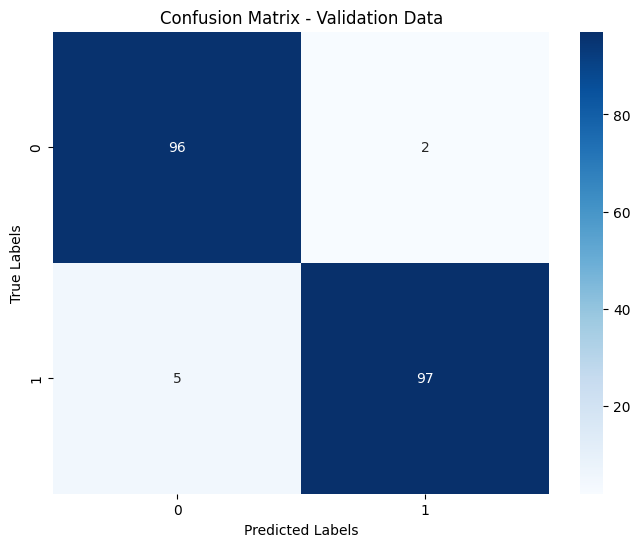

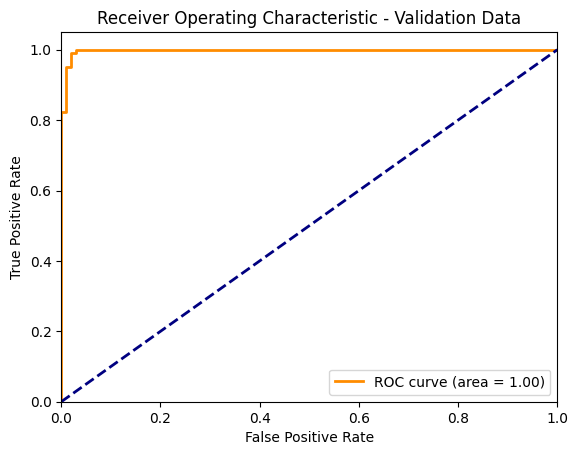

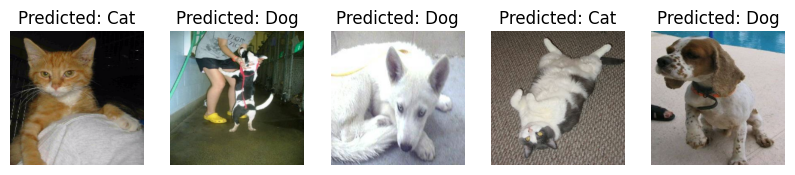

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_images(dataset_path, max_images_per_class=None, infer_labels=True):
    images = []
    labels = []
    image_files = [os.path.join(root, file) 
                   for root, _, files in os.walk(dataset_path) 
                   for file in files if file.endswith(('jpg', 'jpeg', 'png'))]

    if max_images_per_class:
        image_files = shuffle(image_files, random_state=42)[:max_images_per_class]

    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is not None and img.size != 0:
            img = cv2.resize(img, (224, 224))  # Resize to VGG16 input size
            img = img_to_array(img)
            img = preprocess_input(img)
            images.append(img)
            
            if infer_labels:
                if 'cat' in img_path.lower():
                    labels.append(0)
                elif 'dog' in img_path.lower():
                    labels.append(1)
        else:
            print(f"Failed to load image: {img_path}")

    if infer_labels:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

train_dataset_path = r'E:\PRODIGY INTERNSHIP\TASK 3\train\train'
test_dataset_path = r'E:\PRODIGY INTERNSHIP\TASK 3\test\test'

max_images_per_class_train = 1000
max_images_test = 500

X_train, y_train = load_and_preprocess_images(train_dataset_path, max_images_per_class_train)

X_test = load_and_preprocess_images(test_dataset_path, max_images_test, infer_labels=False)

if len(X_train) == 0:
    print("No training images found.")
elif len(X_test) == 0:
    print("No test images found.")
else:
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

    X_train_features = model.predict(X_train)
    X_train_features = X_train_features.reshape((X_train_features.shape[0], -1))

    X_test_features = model.predict(X_test)
    X_test_features = X_test_features.reshape((X_test_features.shape[0], -1))

    X_train_f, X_val_f, y_train, y_val = train_test_split(X_train_features, y_train, test_size=0.2, random_state=42)

    svm_clf = SVC(kernel='linear', probability=True)
    svm_clf.fit(X_train_f, y_train)

    y_val_pred = svm_clf.predict(X_val_f)

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy (SVM): {val_accuracy * 100:.2f}%')

    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Validation Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    y_val_prob = svm_clf.predict_proba(X_val_f)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Validation Data')
    plt.legend(loc="lower right")
    plt.show()

    y_test_pred = svm_clf.predict(X_test_features)

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = X_test[i] + [103.939, 116.779, 123.68]  
        img = np.clip(img, 0, 255).astype(np.uint8)
        plt.imshow(img)  
        plt.title("Predicted: " + ("Cat" if y_test_pred[i] == 0 else "Dog"))
        plt.axis('off')
    plt.show()
